In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_csv("../../Data/Originals/property24_data.csv")

In [3]:
data.shape

(7901, 23)

In [4]:
data.head(5)

,Bathrooms,Bedrooms,Erf Size,Floor Size,Garages,Listing Date,Listing Number,Pet Friendly,Price,Town,...,Secure Parking,Parking,No Pets Allowed,Furnished,Flatlet,Fibre Internet,Furnished (Optional),ADSL Internet,Satellite Internet,Fixed WiMax Internet
0,3.0,3.0,304 m²,326 m²,2.0,10 July 2020,108859219,1.0,6480000.0,"Tokai, Cape Town",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,NaN,140 m²,2.0,23 September 2020,109153971,1.0,6250000.0,"14 Graham Road, Sea Point, Cape Town",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,4.0,659 m²,300 m²,2.0,23 September 2020,109154367,NaN,13950000.0,"Camps Bay, Cape Town",...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,NaN,NaN,NaN,23 September 2020,109154455,NaN,1050000.0,"Ottery, Cape Town",...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,61 m²,NaN,23 July 2020,108907258,NaN,1265000.0,"Muizenberg, Cape Town",...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get categorie

In [5]:
def categorisation(data,date_cols):
    distance = []
    date = []
    numerique = []
    categorique = []
    for col in data.columns:
        if data[col].dtypes == np.object:
            try:
                if str(type(eval(data[col][data[col].first_valid_index()]))) == "<class 'list'>":
                    distance.append(col)
                elif col in date_cols:
                    date.append(col)
                else:
                    categorique.append(col)
            except:
                if col in date_cols:
                    date.append(col)
                else:
                    categorique.append(col)
                
            
        else :
            numerique.append(col)
                
    return dict({"numerique":numerique,"categorique":categorique,"date":date,"distance":distance})

In [6]:
feat_cat = categorisation(data,["Listing Date"])
feat_cat

{'numerique': ['Bathrooms',
  'Bedrooms',
  'Garages',
  'Listing Number',
  'Pet Friendly',
  'Price',
  'Garden',
  'Pool',
  'Secure Parking',
  'Parking',
  'No Pets Allowed',
  'Furnished',
  'Flatlet',
  'Fibre Internet',
  'Furnished (Optional)',
  'ADSL Internet',
  'Satellite Internet',
  'Fixed WiMax Internet'],
 'categorique': ['Erf Size', 'Floor Size', 'Town', 'Type of Property'],
 'date': ['Listing Date'],
 'distance': []}

### Tests

In [7]:
tmp = pd.DataFrame({"a":["1 m2","1 2 ha"],"b":["25",np.nan]})
for col in tmp.columns:
    tmp[col] = tmp[col].replace(" ","",regex=True)
    tmp[col] = tmp[col].str.rstrip("m2")
    serie=[]
    for v in tmp[col]:
        if "ha" in str(v) and str(v) != "nan":
            v = v[:-2]
            serie.append(float(v)*10000)
        else:
            serie.append(v)
    tmp[col] = serie
tmp

,a,b
0,1,25
1,120000.0,NaN


### Data Cleaning

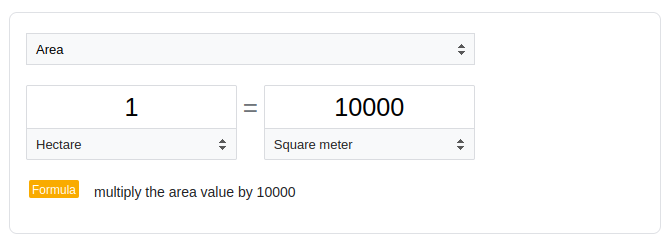

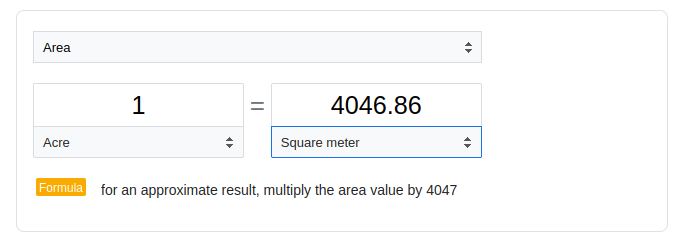

In [8]:
def data_cleaning(data_, name, feat_cat):
    
    print("Drop NaN price (to get a cleaned y value)")
    data = data_[data_["Price"].astype("str")!="nan"]
    
    ### DATA Cleaning
    for col in list(feat_cat["categorique"]):
        
        if "Size" in col or "size" in col :
            data[col] = data[col].replace(" ","",regex=True)
            data[col] = data[col].str.rstrip("m²")
            ### in case of system formatting problems
            data[col] = data[col].str.rstrip("m�")
            data[col] = data[col].str.rstrip("m\B2")
            data[col] = data[col].str.rstrip("mÂ")
            serie=[]
            for v in data[col]:
                if "ha" in str(v) and str(v) != "nan":
                    v = v[:-2]
                    serie.append(float(v)*10000)
                elif "acres" in str(v) and str(v) != "nan":
                    v = v[:-2]
                    serie.append(float(v)*4046.86)
                else:
                    serie.append(v)
            data[col] = serie
            data[col] = pd.to_numeric(data[col])

        elif "Coverage" in col :
            data[col] = data[col].str.rstrip(" %")
            data[col] = data[col].replace(r" ","",regex=True)
            data[col] = pd.to_numeric(data[col])

        elif "Height Restriction" in col:
            data[col] = data[col].replace(r" ","",regex=True)
            data[col] = data[col].str.rstrip("m²")
            data[col] = data[col].str.rstrip("m�")
            data[col] = data[col].str.rstrip("m\B2")
            data[col] = data[col].str.rstrip("mÂ")
            serie=[]
            for v in data[col]:
                if "ha" in str(v) and str(v) != "nan":
                    v = v[:-2]
                    serie.append(float(v)*10000)
                elif "acres" in str(v) and str(v) != "nan":
                    v = v[:-2]
                    serie.append(float(v)*4046.86)
                else:
                    serie.append(v)
            data[col] = serie
            data[col] = pd.to_numeric(data[col])

    for col in list(feat_cat["date"]):
        data[col] = pd.to_datetime(data[col])
        
    for col in list(feat_cat["numerique"]):
        data[col] = pd.to_numeric(data[col])
    
    for col in list(feat_cat["distance"]):
        ### Format list values
        if str(type(data[col][data[col].first_valid_index()])) == "<class 'list'>":
            series=[]
            for value in data[col]:
                if str(value) != "nan":
                    value = [i.replace('km','') for i in value]
                    value = [float(i) for i in value]
                series.append(value)
            data[col] = series
    
    #data = data.drop_duplicates()
    
    #data["index"] = data.index
    print("data dimensions:",data.shape)
    return data

In [9]:
data = data_cleaning(data,"Dataset.csv",feat_cat)

Drop NaN price (to get a cleaned y value)
data dimensions: (7846, 23)


<ipython-input-8-e7dbfa226b9d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].replace(" ","",regex=True)
<ipython-input-8-e7dbfa226b9d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.rstrip("m²")
<ipython-input-8-e7dbfa226b9d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

### Format column name

In [10]:
def to_snake_case(string):
    string = re.sub('\s+', r'_', string)   
    return string.lower()

data= data.rename(to_snake_case, axis='columns')

### Data saving

In [11]:
save_to = "../../Data/Dataset.csv"
data.to_csv(save_to,sep=",",index=False)

In [12]:
feat_cat = categorisation(data,["Listing Date"])
feat_cat

{'numerique': ['bathrooms',
  'bedrooms',
  'erf_size',
  'floor_size',
  'garages',
  'listing_date',
  'listing_number',
  'pet_friendly',
  'price',
  'garden',
  'pool',
  'secure_parking',
  'parking',
  'no_pets_allowed',
  'furnished',
  'flatlet',
  'fibre_internet',
  'furnished_(optional)',
  'adsl_internet',
  'satellite_internet',
  'fixed_wimax_internet'],
 'categorique': ['town', 'type_of_property'],
 'date': [],
 'distance': []}